In [24]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [25]:
filename = '../../outputs/correlation-05-17-2021_14-43-14.csv'
df = pd.read_csv(filename)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs

In [30]:
over_90 = df[db.test_acc > 0.9]
x = "quality_L2"
y = "test_acc"
print(over_90.shape)
print(over_90.columns)

(485, 38)
Index(['model_num', 'test_acc', 'test_loss', 'train_acc', 'train_loss',
       'quality_L1', 'quality_L2', 'quality_prod', 'KG_L1', 'MC_L1', 'MC_L3',
       'ER_L1', 'mquality_L1', 'mquality_prod', 'mquality-wL1', 'mquality-wp',
       'qlayer0mode3', 'qlayer0mode4', 'qlayer-1mode3', 'qlayer-1mode4', 'KG0',
       'KG-1', 'MC0', 'MC-1', 'qnL1', 'qnL3', 'qnL4', 'qnL5', 'qnrL1', 'qnrL3',
       'qnrL4', 'qnrL5', 'qnprL1', 'qnprL3', 'qnprL4', 'qnprL5', 'qnrL6',
       'qnrL7'],
      dtype='object')
<ipython-input-30-d730135c49e7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  over_90 = df[db.test_acc > 0.9]


In [40]:
cols = ['quality_L1', 'quality_L2', 'quality_prod', 'KG_L1', 'MC_L1', 'MC_L3',
       'ER_L1', 'mquality_L1', 'mquality_prod', 'mquality-wL1', 'mquality-wp',
       'qlayer0mode3', 'qlayer0mode4', 'qlayer-1mode3', 'qlayer-1mode4', 'KG0',
       'KG-1', 'MC0', 'MC-1', 'qnL1', 'qnL3', 'qnL4', 'qnL5', 'qnrL1', 'qnrL3',
       'qnrL4', 'qnrL5', 'qnprL1', 'qnprL3', 'qnprL4', 'qnprL5', 'qnrL6',
       'qnrL7']
test_acc_vec = over_90['test_acc']
train_acc_vec = over_90['train_acc']
gap = train_acc_vec - test_acc_vec
results = {}

for x in cols:
    col = over_90[x]
    vec = col.to_numpy()
    results[x + "_test"] = stats.pearsonr(vec, test_acc_vec)[0]
    results[x + "_train"] = stats.pearsonr(vec, train_acc_vec)[0]
    results[x + "_gap"] = stats.pearsonr(vec, gap)[0]

In [45]:
print(results)

{'quality_L1_test': -0.0946713908368098, 'quality_L1_train': -0.1686201913825031, 'quality_L1_gap': 0.013077802604231156, 'quality_L2_test': -0.17500278868343933, 'quality_L2_train': -0.25686360304181366, 'quality_L2_gap': 0.06501702973563751, 'quality_prod_test': -0.036509932393578956, 'quality_prod_train': -0.08951219906763837, 'quality_prod_gap': -0.013192552516198792, 'KG_L1_test': -0.008144572653479147, 'KG_L1_train': -0.09789892418466978, 'KG_L1_gap': -0.060986790377976496, 'MC_L1_test': -0.012841365993408176, 'MC_L1_train': 0.04017796626765309, 'MC_L1_gap': 0.048734262319030865, 'MC_L3_test': 0.044827298433764734, 'MC_L3_train': 0.027138301290806247, 'MC_L3_gap': -0.04544707996791317, 'ER_L1_test': 0.08629305566686975, 'ER_L1_train': 0.062098859842328526, 'ER_L1_gap': -0.08014427670956892, 'mquality_L1_test': -0.49272347283102147, 'mquality_L1_train': -0.48610383545075725, 'mquality_L1_gap': 0.3596520001293474, 'mquality_prod_test': -0.3504151533696152, 'mquality_prod_train': -0

([<matplotlib.axis.XTick at 0x20e96bdba60>,
 [Text(0, 0, 'quality_L1_test'),
  Text(1, 0, 'quality_L1_train'),
  Text(2, 0, 'quality_L1_gap'),
  Text(3, 0, 'quality_L2_test'),
  Text(4, 0, 'quality_L2_train'),
  Text(5, 0, 'quality_L2_gap'),
  Text(6, 0, 'quality_prod_test'),
  Text(7, 0, 'quality_prod_train'),
  Text(8, 0, 'quality_prod_gap'),
  Text(9, 0, 'KG_L1_test'),
  Text(10, 0, 'KG_L1_train'),
  Text(11, 0, 'KG_L1_gap'),
  Text(12, 0, 'MC_L1_test'),
  Text(13, 0, 'MC_L1_train'),
  Text(14, 0, 'MC_L1_gap'),
  Text(15, 0, 'MC_L3_test'),
  Text(16, 0, 'MC_L3_train'),
  Text(17, 0, 'MC_L3_gap'),
  Text(18, 0, 'ER_L1_test'),
  Text(19, 0, 'ER_L1_train'),
  Text(20, 0, 'ER_L1_gap'),
  Text(21, 0, 'mquality_L1_test'),
  Text(22, 0, 'mquality_L1_train'),
  Text(23, 0, 'mquality_L1_gap'),
  Text(24, 0, 'mquality_prod_test'),
  Text(25, 0, 'mquality_prod_train'),
  Text(26, 0, 'mquality_prod_gap'),
  Text(27, 0, 'mquality-wL1_test'),
  Text(28, 0, 'mquality-wL1_train'),
  Text(29, 0, 'mq

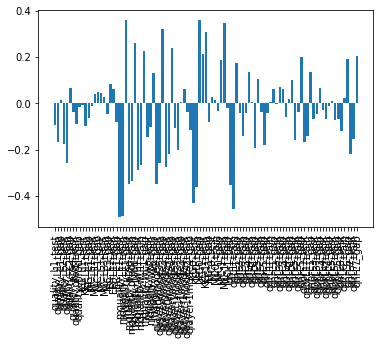

In [47]:
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()),rotation='vertical')